In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import xgboost as xgb


In [5]:
#loard data set to a pandas data frame
credit_card_data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [6]:
# first 5 rows of the dataset
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#last 5 rows 
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
#data set information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#check the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#distribution of legit transaction and fraudelent transaction
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

 this dataset is highly unbalanced 
 0--> normal transaction
 1--> fraudulent transaction
 

In [12]:
# sepracting the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [13]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
#statistical mesaure of the data 
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
# compare value for both the transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


under-sampeling

build a sample dataset containing similar distribution of normal transaction and fraudelent transaction

In [18]:
legit_sample = legit.sample(n=492)

In [21]:
new_dataset = pd.concat([legit_sample,fraud], axis=0)

In [22]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
49019,43877.0,-1.877552,-2.105484,2.065321,-1.909366,-0.868993,-1.258439,0.098195,-0.485254,-2.145289,...,-0.364677,-0.648184,0.088454,0.674307,0.115990,-0.531176,-0.076981,-0.110962,285.70,0
95998,65558.0,-1.067544,1.467897,0.375774,0.714994,-0.190069,0.091621,-0.158846,1.002852,-1.031592,...,0.303242,0.576901,-0.086948,-0.316060,-0.316759,-0.307527,-0.196536,0.007363,10.18,0
78017,57329.0,1.414249,-0.609708,-0.534166,-1.204755,0.153321,0.624398,-0.534793,0.088296,-1.079728,...,0.195498,0.464480,-0.334763,-1.655305,0.757933,-0.000914,0.001254,-0.015695,36.00,0
129935,79245.0,1.246559,-0.373828,0.903546,-0.721576,-1.241509,-0.833708,-0.596242,-0.013452,1.874226,...,-0.016327,0.185790,-0.031424,0.399964,0.488321,-0.685433,0.091366,0.034550,1.00,0
126956,78158.0,1.049222,-0.401592,1.301356,0.997817,-1.398577,-0.501422,-0.609568,0.092222,1.051789,...,-0.047580,-0.119600,0.033856,0.723284,0.156430,0.294088,0.000344,0.038158,64.99,0


In [23]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [25]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [26]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95435.451220,-0.049336,-0.127750,-0.000273,-0.050702,0.069751,0.051574,0.026081,0.040450,0.042883,...,-0.010300,-0.032975,0.009334,0.040390,0.048924,0.012121,-0.003429,-0.000708,-0.005978,96.013150
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#spliting data set into features and target


In [27]:
X = new_dataset.drop(columns='Class' , axis=1)
Y = new_dataset['Class']

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [28]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
49019    43877.0 -1.877552 -2.105484  2.065321 -1.909366 -0.868993 -1.258439   
95998    65558.0 -1.067544  1.467897  0.375774  0.714994 -0.190069  0.091621   
78017    57329.0  1.414249 -0.609708 -0.534166 -1.204755  0.153321  0.624398   
129935   79245.0  1.246559 -0.373828  0.903546 -0.721576 -1.241509 -0.833708   
126956   78158.0  1.049222 -0.401592  1.301356  0.997817 -1.398577 -0.501422   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [30]:
print(Y)

49019     0
95998     0
78017     0
129935    0
126956    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


split data into train and test data


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


model training

Logistic Regresssion

In [34]:
model = LogisticRegression()

In [35]:
# training the logistic Regression model with training data

model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
evalaute the model based on acuracy score


In [36]:
# accuracy on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [37]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9440914866581956


In [38]:
# accuracy on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [39]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9390862944162437


In [41]:
# Initialize the Random Forest Classifier model
# You can tune hyperparameters like n_estimators (number of trees) for better performance
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [42]:
# Train the Random Forest model with the training data
model_rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Make predictions on the training data
X_train_prediction_rf = model_rf.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, Y_train)

In [44]:
# Make predictions on the test data
X_test_prediction_rf = model_rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)

In [45]:
# Print the accuracy on the test data
print('Accuracy on Test data (Random Forest): ', test_data_accuracy_rf)

Accuracy on Test data (Random Forest):  0.9289340101522843


In [47]:
# Calculate Precision
precision_rf = precision_score(Y_test, X_test_prediction_rf)
print('Precision on Test data (Random Forest):', precision_rf)

Precision on Test data (Random Forest): 0.9883720930232558


In [48]:
# Calculate Recall
recall_rf = recall_score(Y_test, X_test_prediction_rf)
print('Recall on Test data (Random Forest):', recall_rf)


Recall on Test data (Random Forest): 0.8673469387755102


In [49]:
# Calculate F1-Score
f1_rf = f1_score(Y_test, X_test_prediction_rf)
print('F1-Score on Test data (Random Forest):', f1_rf)

F1-Score on Test data (Random Forest): 0.9239130434782609


In [50]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the XGBoost Classifier
# You can tune hyperparameters for better performance
model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the XGBoost model with the training data
model_xgb.fit(X_train, Y_train)

# Make predictions on the training data
X_train_prediction_xgb = model_xgb.predict(X_train)
training_data_accuracy_xgb = accuracy_score(X_train_prediction_xgb, Y_train)

# Print the accuracy on the training data
print('Accuracy on Training data (XGBoost):', training_data_accuracy_xgb)

# Make predictions on the test data
X_test_prediction_xgb = model_xgb.predict(X_test)
test_data_accuracy_xgb = accuracy_score(X_test_prediction_xgb, Y_test)

# Print the accuracy on the test data
print('Accuracy on Test data (XGBoost):', test_data_accuracy_xgb)

# Calculate Precision
precision_xgb = precision_score(Y_test, X_test_prediction_xgb)
print('Precision on Test data (XGBoost):', precision_xgb)

# Calculate Recall
recall_xgb = recall_score(Y_test, X_test_prediction_xgb)
print('Recall on Test data (XGBoost):', recall_xgb)

# Calculate F1-Score
f1_xgb = f1_score(Y_test, X_test_prediction_xgb)
print('F1-Score on Test data (XGBoost):', f1_xgb)

Accuracy on Training data (XGBoost): 1.0
Accuracy on Test data (XGBoost): 0.9187817258883249
Precision on Test data (XGBoost): 0.9659090909090909
Recall on Test data (XGBoost): 0.8673469387755102
F1-Score on Test data (XGBoost): 0.9139784946236559


Model Comparison 📈
Here is a summary comparing the performance of all three models you have explored so far.

Model	            Accuracy Precision Recall F1-Score
Logistic Regression	0.939	 —        —	              —
Random Forest	    0.929	 0.988	   0.867	0.924
XGBoost          	0.919	 0.966	   0.867	0.914

Random Forest and XGBoost show a similar level of performance based on their recall and F1-scores. The most significant difference is in their Precision, with Random Forest having a slightly higher score. However, all three models provide a solid baseline, and the Random Forest and XGBoost models are a significant improvement on the simple accuracy score of the Logistic Regression model, particularly when looking at how they handle the minority class.


In [51]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the XGBoost model
model_xgb = xgb.XGBClassifier(random_state=42)

# Define the hyperparameters to tune
# You can add more parameters or change the range to explore a wider search space
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
# The scoring metric is set to 'f1' as it's more suitable for imbalanced datasets
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best hyperparameters found: ", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_test_prediction_best_xgb = best_xgb_model.predict(X_test)

print('Best Model - Accuracy on Test Data:', accuracy_score(Y_test, X_test_prediction_best_xgb))
print('Best Model - Precision on Test Data:', precision_score(Y_test, X_test_prediction_best_xgb))
print('Best Model - Recall on Test Data:', recall_score(Y_test, X_test_prediction_best_xgb))
print('Best Model - F1-Score on Test Data:', f1_score(Y_test, X_test_prediction_best_xgb))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Model - Accuracy on Test Data: 0.9187817258883249
Best Model - Precision on Test Data: 0.9659090909090909
Best Model - Recall on Test Data: 0.8673469387755102
Best Model - F1-Score on Test Data: 0.9139784946236559


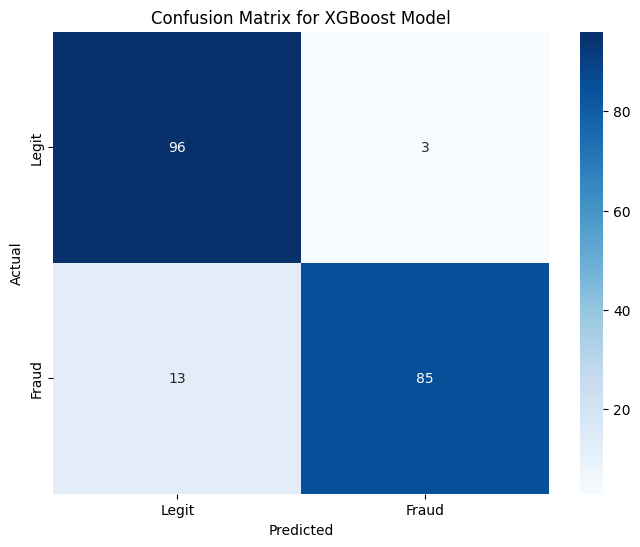

Confusion Matrix:
[[96  3]
 [13 85]]


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test data using the best model
X_test_prediction_best_xgb = best_xgb_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction_best_xgb)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)

**Summary**

Data Preparation: loaded the credit card fraud dataset and, recognizing its high class imbalance, used undersampling to create a balanced dataset for your models to learn from.

Model Training: implemented and evaluated three different machine learning models: logistic regression, random forest, and XGBoost.

Performance Evaluation: went beyond simple accuracy to use more advanced metrics—precision, recall, and the F1-score—to understand how your models performed on the challenging task of identifying fraudulent transactions. Your models, particularly Random Forest and XGBoost, showed a strong ability to correctly identify fraud with high precision.

Model Optimization and Visualization: performed hyperparameter tuning to optimize your XGBoost model and visualized its performance using a confusion matrix, which provided a clear, intuitive breakdown of your model's predictions.

